In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook")

In [9]:
def mean(x: np.array) -> float:
    return sum(x)/len(x)

print(mean(bernoulli_sample))
print(np.mean(bernoulli_sample))

0.2
0.2


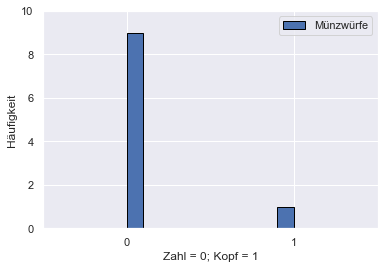

In [31]:
from scipy.stats import bernoulli

p = 0.3
n_samples = 10

bernoulli_sample = bernoulli.rvs(size = n_samples, p = p)

plt.hist(bernoulli_sample, edgecolor = "black")
plt.xlabel("Zahl = 0; Kopf = 1")
plt.ylabel("Häufigkeit")
plt.xlim(-0.5, 1.5);
plt.ylim(0, n_samples)
plt.xticks([0, 1], [0, 1]);
plt.legend(["Münzwürfe"]);

In [59]:
n_samples = 10

means_samples = [mean(bernoulli.rvs(size = n_samples, p = p)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.1, 0.3, 0.5, 0.4, 0.4, 0.3, 0.3, 0.1, 0.1, 0.6]
0.5


In [60]:
n_samples = 10000

means_samples = [mean(bernoulli.rvs(size = n_samples, p = p)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.2973, 0.2944, 0.2926, 0.2976, 0.312, 0.3013, 0.2957, 0.3005, 0.2976, 0.2967]
0.019399999999999973


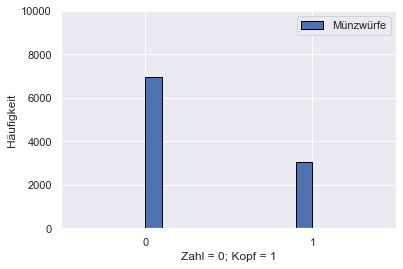

In [65]:
p = 0.3
n_samples = 10000

bernoulli_sample = bernoulli.rvs(size = n_samples, p = p)

plt.hist(bernoulli_sample, edgecolor = "black")
plt.xlabel("Zahl = 0; Kopf = 1")
plt.ylabel("Häufigkeit")
plt.xlim(-0.5, 1.5);
plt.ylim(0, n_samples);
plt.xticks([0, 1], [0, 1]);
plt.legend(["Münzwürfe"]);

In [70]:
mu = 0
sigma = 1
n_samples = 10

normal_sample = np.random.normal(mu, sigma, n_samples)
normal_sample

array([-1.41264135, -0.31677854, -1.00446212, -0.1302536 ,  1.28709571,
        0.9260424 ,  0.05639532, -0.99835037,  0.73381437, -0.10615991])

In [85]:
n_samples = 10

means_samples = [mean(np.random.normal(mu, sigma, n_samples)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.33623934658125576, 0.048089190728061754, 0.028828607156080644, -0.0994662239123818, -0.20632747207127408, 0.058264818873552615, -0.44536651309904557, 0.3169280407961933, -0.12473862949153698, 0.2530517958961135]
0.7816058596803013


In [89]:
n_samples = 10000

means_samples = [mean(np.random.normal(mu, sigma, n_samples)) for i in range(10)]
print(means_samples)
print(max(means_samples)-min(means_samples))

[0.0009795408617692667, -0.004202152866989583, 0.013832364261183429, -0.008009118423987164, -0.01719240170870045, 0.00048270298148588535, -0.017185013501685095, 0.006508791065721916, 0.008568876033146109, -0.02705061716116824]
0.040882981422351666


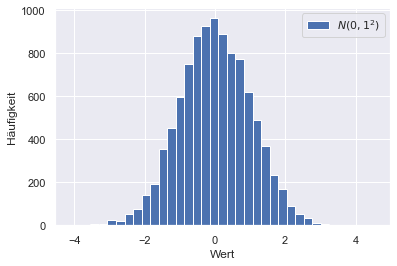

In [93]:
mu = 0
sigma = 1
n_samples = 10000

normal_sample = np.random.normal(mu, sigma, n_samples)

plt.hist(normal_sample, bins = int(1 + 3.3*np.log(len(normal_sample))))
plt.xlabel("Wert")
plt.xlim(min(normal_sample) - 1, max(normal_sample) + 1)
plt.ylabel("Häufigkeit")
plt.legend([f"$N({mu},{sigma}^2)$"]);